In [18]:
all <- read.table("hw9t3v0.txt")
colnames(all) <- c('y', 'x1', 'x2', 'x3', 'x4', 'x5')
all[1:10,]

y,x1,x2,x3,x4,x5
1.894,1.059,5.074,0.172,2.134,44.277
1.996,1.123,15.074,0.188,2.389,63.779
1.805,2.016,7.695,0.203,3.337,63.008
1.998,1.390,1.316,0.133,3.255,42.985
1.996,1.111,12.508,0.180,2.464,58.507
1.768,1.300,10.594,0.133,2.208,56.031
2.000,1.299,8.195,0.117,2.910,52.984
1.856,1.750,15.555,0.148,2.645,71.427
1.593,1.122,2.348,0.195,3.916,41.664
1.336,1.376,0.961,0.141,3.449,40.332


In [31]:
n <- 400
q <- 100
train <- all[1:n,]
test <- all[400:500,]


После считывания данных и приведения их более-менее приемлимый вид, проведём отбор признаков

In [20]:
model <- lm(y ~ x1 + x2 + x3 + x4 + x5, data = train)
summary(model)



Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4923 -0.1956  0.1431  0.2785  0.6240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.628636   0.123226  13.217  < 2e-16 ***
x1          -0.367433   0.075554  -4.863 1.67e-06 ***
x2          -0.021002   0.007408  -2.835  0.00482 ** 
x3           0.648054   0.587072   1.104  0.27032    
x4          -0.066484   0.020512  -3.241  0.00129 ** 
x5           0.014326   0.003240   4.422 1.27e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3962 on 394 degrees of freedom
Multiple R-squared:  0.07473,	Adjusted R-squared:  0.06299 
F-statistic: 6.364 on 5 and 394 DF,  p-value: 1.065e-05


Третий признак не является значимым для регресии, исключим его из модели

In [21]:
perfect_model <- lm(y ~ model$coefficients[2]x1 + x2 + x4 + x5, data = train)
summary(perfect_model)



Call:
lm(formula = y ~ x1 + x2 + x4 + x5, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4724 -0.2133  0.1414  0.2821  0.6241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.730785   0.081395  21.264  < 2e-16 ***
x1          -0.375911   0.075183  -5.000 8.64e-07 ***
x2          -0.021512   0.007396  -2.909 0.003833 ** 
x4          -0.068178   0.020460  -3.332 0.000943 ***
x5           0.014700   0.003223   4.561 6.80e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3964 on 395 degrees of freedom
Multiple R-squared:  0.07187,	Adjusted R-squared:  0.06247 
F-statistic: 7.646 on 4 and 395 DF,  p-value: 6.091e-06


In [32]:

prediction <- predict(perfect_model, newdata=test)
dev <- prediction - test$y
summary(dev)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.6176000 -0.2539000 -0.1455000 -0.0008259  0.2190000  1.2500000 

Остатки маленькие, что показывает, что наша модел выбрана хорошо. посмотрим на них

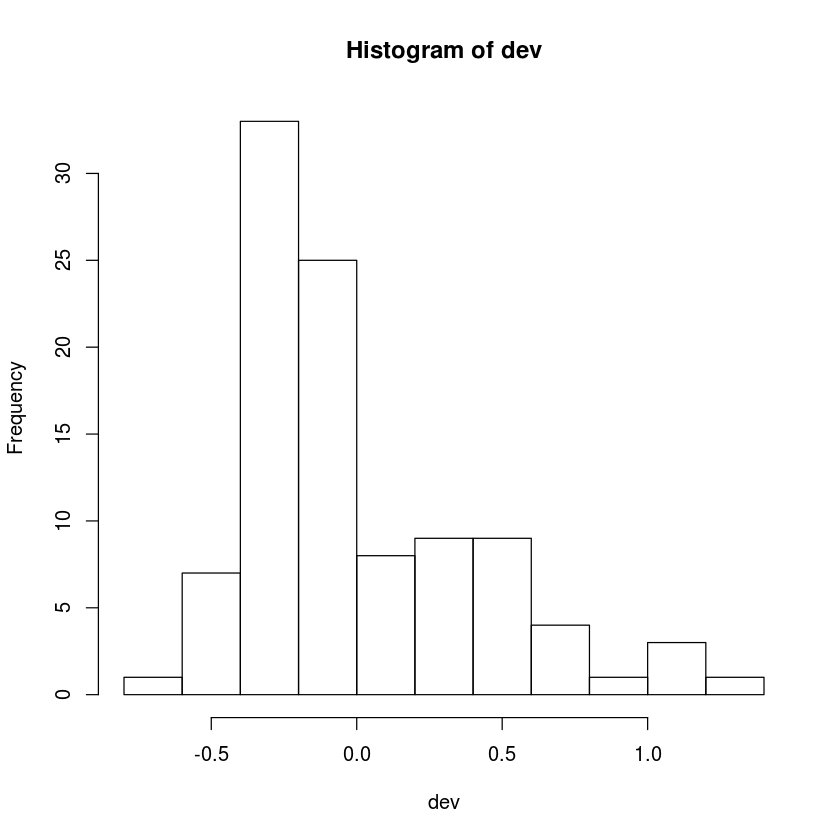

In [33]:
hist(dev)